# ขั้นตอนการ import ข้อมูล

เนื่องจากเพื่อความสะดวกในการทำงาน จึงทำการอัปโหลดไฟล์ dataset ไว้ใน Google Drive ดังนั้นจึงจำเป็นต้องทำการเชื่อม Google Colab กับ Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ทำการ import library ที่ใช้ ซึ่งมีดังนี้


*   numpy ใช้ในเรียกคำสั่งพื้นฐาน
*   pandas ใช้ในการอ่านไฟล์ dataset
*   math ใช้เรียกฟังก์ชันคำนวณต่าง ๆ
*   random ใช้ในการ random ค่า
*   copy ใช้ในการ copy ข้อมูล
*   warnings ใช้ในการปิดแจ้งเตือน warning
*   train_test_split จาก sklearn ใช้ในการแยกข้อมูลออกเป็น train set และ test set
*   accuracy_score จาก sklearn ใช้ในการคำนวณหาค่าประสิทธิภาพของ Naive Bayes
*   mean_squared_error จาก sklearn ใช้ในการวัดความแตกต่างระหว่างค่าจริงและคำที่ทำนายของ Linear Regression



In [ ]:
import numpy as np
import pandas as pd
import math
import random
import copy
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
warnings.filterwarnings("ignore")
random.seed(0)

ทำการอ่านข้อมูลจาก Google Drive โดยนำข้อมูลมาเก็บใส่ตัวแปรดังนี้


*   ตัวแปร Iris_Flower ทำการอ่านข้อมูลจากไฟล์ Iris_Flower 
*   ตัวแปร Red_Wine_Quality ทำการอ่านข้อมูลจากไฟล์ Red_Wine_Quality 
*   ตัวแปร Loan_Prediction_test ทำการอ่านข้อมูลจากไฟล์ Loan_Prediction_test
*   ตัวแปร Loan_Prediction_train ทำการอ่านข้อมูลจากไฟล์ Loan_Prediction_train 



In [ ]:
Iris_Flower = pd.read_csv('/content/drive/MyDrive/CS/CS348/Homework 3/Iris_Flower.csv')
Red_Wine_Quality = pd.read_csv('/content/drive/MyDrive/CS/CS348/Homework 3/Red_Wine_Quality.csv')
Loan_Prediction_test = pd.read_csv('/content/drive/MyDrive/CS/CS348/Homework 3/Loan_Prediction_test.csv')
Loan_Prediction_train = pd.read_csv('/content/drive/MyDrive/CS/CS348/Homework 3/Loan_Prediction_train.csv')

# ขั้นตอนการเตรียมข้อมูล

ทำการ drop แถวที่มีค่า null (บางข้อมูลอาจมีค่าที่เป็น null ซึ่งอาจทำให้ plot กราฟมีปัญหา จึงทำการ drop แถวที่มีค่าเป็น null)

In [ ]:
Iris_Flower.dropna(inplace=True)
Red_Wine_Quality.dropna(inplace=True)
Loan_Prediction_train.dropna(inplace=True)
Loan_Prediction_test.dropna(inplace=True)

ทำการแยก features และ output โดยแยกออกมาและไปเก็บในตัวแปรใหม่ (เก็บเป็น list)

จากนั้นเมื่อแยกเสร็จจะนำตัวแปรใหม่นั้นไปทำการแยกออกเป็น train set และ test set โดยกำหนดให้ train set มีขนาด 80 และ test set มีขนาด 20 และกำหนด random_state = 1 เพื่อให้สุ่มครั้งถัดไปยังคงได้ค่าเดิม

In [ ]:
X_Iris = Iris_Flower.iloc[:, :4].values.tolist()
Y_Iris = Iris_Flower.iloc[:, 4].values.tolist()
X_train_Iris, X_test_Iris, Y_train_Iris, Y_test_Iris = train_test_split(X_Iris, Y_Iris, test_size = 0.2, random_state = 1)

In [ ]:
X_Wine = Red_Wine_Quality.iloc[:, :11].values.tolist()
Y_Wine = Red_Wine_Quality.iloc[:, 11].values.tolist()
X_train_Wine, X_test_Wine, Y_train_Wine, Y_test_Wine = train_test_split(X_Wine, Y_Wine, test_size = 0.2, random_state=1)

เนื่องจากชุดข้อมูลของ Loan Prediction นั้น มีให้ทั้ง train set และ test set (ไม่มี Y_test หรือก็คือไม่มีเฉลย) ทำให้ในส่วนนี้ไม่ต้องใช้ train_test_split ในการแยก

In [ ]:
X_train_Loan_No_Answer = Loan_Prediction_train.iloc[:, 1:12].values.tolist()
Y_train_Loan_No_Answer= Loan_Prediction_train.iloc[:, 12].values.tolist()
X_test_Loan_No_Answer = Loan_Prediction_test.iloc[:, 1:].values.tolist()                    

แต่เพื่อที่จะได้ดูประสิทธิภาพของ model ที่จะสร้าง จึงใช้ข้อมูลจาก Loan_Prediction_train ที่มี output มาแยกเป็น train set และ test set เพื่อที่จะได้ดูประสิทธิภาพของข้อมูล

In [ ]:
X_Loan = Loan_Prediction_train.iloc[:, 1:12].values.tolist()
Y_Loan= Loan_Prediction_train.iloc[:, 12].values.tolist()
X_train_Loan, X_test_Loan, Y_train_Loan, Y_test_Loan = train_test_split(X_Loan, Y_Loan, test_size = 0.2, random_state=1)

# ขั้นตอนการสร้างโมเดล

ทำการสร้าง Model ตามปัญหาที่มี 

โดยปัญหา 1.A และ 1.C จะใช้ Naive Bayes ในการแก้ไขปัญหา และปัญหา 1.B จะใช้ Linear Regression ในการแก้ไขปัญหา

## Classification

Model Naïve Bayes ได้ใช้วิธีคิดจาก Naïve Bayes Algorithm โดยหาผลลัพธ์จากการหาด้วย argmax 

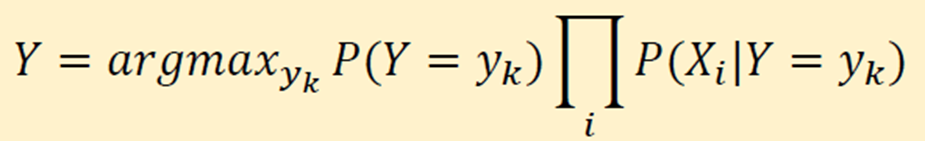

ซึ่งใช้ Model Naïve Bayes ในการแก้ปัญหาในข้อ 1.A และ 1.C ซึ่งข้อมูลทั้ง 2 มีข้อมูลทั้งแบบ discrete และ continuous

โดยแบบ discrete ใช้วิธีการหาค่าแบบ Maximum likelihood estimates (MLE)
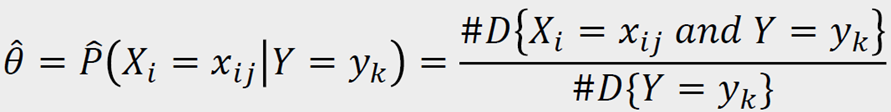

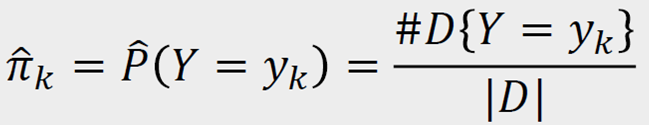

และแบบ continuous ได้ใช้วิธีการหาค่าจาก Gaussian Distribution โดยต้องหาค่า mean และ S.D. ก่อน
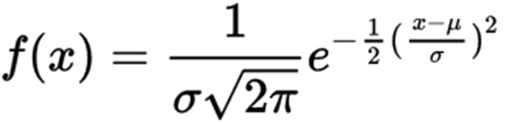

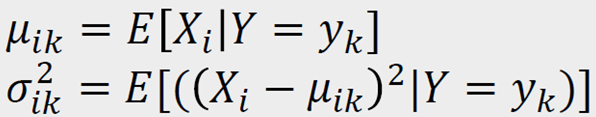

In [ ]:
#ตั้งชื่อ Class ว่า NaiveBayesModel
class NaiveBayesModel:
  #ไม่ได้มีการกำหนด __init__

  #ฟังก์ชัน fit ที่รับ 2 ตัวแปร X และ Y 
  #จะเป็นฟังก์ชันในการให้ model ฝึกฝน (train)
  def fit(self, X, Y):
    self.X = X
    self.Y = Y

    #ไว้สำหรับสร้าง dictionary ของ output
    dict_output = {}
    count = 0
    for i in self.Y:
      if i not in dict_output:
        dict_output[i] = 1
      else:
        dict_output[i] += 1
      count += 1

    self.dict_output = dict_output
    self.count = count

    #กำหนด threshold ไว้สำหรับเช็คแต่ละ feature ว่าเป็นข้อมูลประเภท discrete หรือ continuous
    threshold = round(len(self.X) * 0.01)

    #ไว้สำหรับเช็คแต่ละ feature ว่าเป็นข้อมูลประเภทอะไร 
    #ถ้าเป็น discrete จะให้เป็น False หากเป็น continuous จะให้เป็น True
    check_value_type = []
    for i in range(len(self.X[0])):
      unique_list = []
      for j in range(len(self.X)):
        if self.X[j][i] not in unique_list:
          unique_list.append(self.X[j][i])
      if len(unique_list) > threshold:
        check_value_type.append(True)
      else:
        check_value_type.append(False)
      
    self.check_value_type = check_value_type

    #สร้างตัวแปร model ไว้สำหรับเก็บ model ในการคำนวณสำหรับข้อมูล test
    model = []
    for i in range(len(check_value_type)):
      #เป็นส่วนของข้อมูลที่เป็น continuous
      #จะใช้วิธีการ Gaussian Distribution โดยจะหาค่า mean และ S.D.
      #โดยจะทำเป็น dictionary เพื่อแยกเก็บข้อมูลตาม output
      #จากนั้นถึงหาค่า mean และ S.D. ตามประเภทของข้อมูล
      if check_value_type[i]:
        dict_feature = {}
        for j in range(len(self.X)):
          if self.Y[j] not in dict_feature:
            dict_feature[self.Y[j]] = [self.X[j][i]]
          else:
            dict_feature[self.Y[j]].append(self.X[j][i])
            
        for j in dict_feature:
          array = np.array(dict_feature[j])
          dict_feature[j] = [np.mean(array), np.std(array)]
        model.append(dict_feature)

      #เป็นส่วนของข้อมูลที่เป็น discrete
      #จะใช้วิธีการ Maximum likelihood estimates (MLE)
      #โดยจะทำเป็น DataFrame แยกเก็บข้อมูลตาม output
      else:
        dict_feature = pd.DataFrame(columns=dict_output.keys())
        data = [[0 for j in range(len(dict_output))]]
        for j in range(len(self.X)):
          if self.X[j][i] not in dict_feature.index:
            dict_feature = dict_feature.append(pd.DataFrame(data, columns=dict_output.keys(), index=[self.X[j][i]]))
          dict_feature.loc[self.X[j][i]][self.Y[j]] += 1
        model.append(dict_feature)
    self.model = model

  #ฟังก์ชัน predict ที่รับข้อมูล test มา predict
  #โดยทำการ predict จากสมการ Naive Bayes โดยหาเพียง argmax
  #ข้อมูลแถวหนึ่งจะนำไปหาค่า argmax ตาม output ที่มี หากค่า argmax ของ output ไหนได้เยอะสุด ข้อมูลนั้นก็จะมี output นั้น 
  def predict(self, test):
    predict = []
    for i in range(len(test)):
      list_sum = {}
      for j in self.dict_output:
        list_sum[j] = 1
        for k in range(len(self.check_value_type)):
          if self.check_value_type[k]:
            cal = (1 / (math.sqrt(2 * math.pi) * self.model[k][j][1])) * (1 / (math.e ** (((test[i][k] - self.model[k][j][0]) ** 2) / (2 * (self.model[k][j][1] ** 2)))))
            list_sum[j] *= cal
          else:
            list_sum[j] *= self.model[k].loc[test[i][k], j] / self.dict_output[j]
        list_sum[j] *= self.dict_output[j] / self.count
      predict.append(max(list_sum, key=list_sum.get))
    return predict

## Regression

Model Linear Regression เนื่องจากข้อมูลของ 1.B มีหลาย feature ทำให้เลือกใช้เป็น Multiple Linear Regression โดยได้ใช้สมการดังภาพนี้

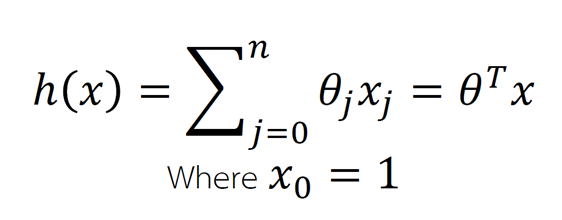

โดยการทำ Linear Regression จะต้องหาค่า θ ที่ทำให้ J(θ) มีค่าน้อยที่สุด โดยสมการของ J(θ) จะใช้ดังภาพนี้ 

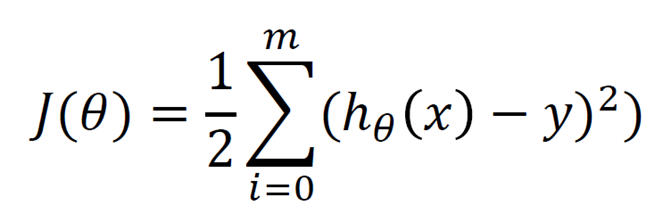

วิธีการหา θ จะใช้วิธีที่ชื่อ Gradient Descent Algorithm ซึ่งวิธีการดังกล่าวจะมีวิธีให้เลือกหลายวิธี โดยที่เลือกใช้จะเป็น Batch Gradient Descent, Stochastic Gradient Descent และ Mini Batch Gradient Descent

Batch Gradient Descent
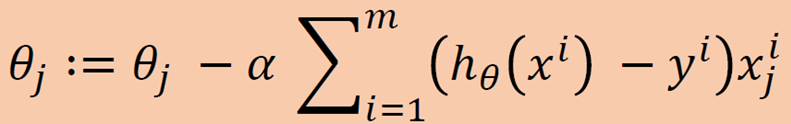

Stochastic Gradient Descent
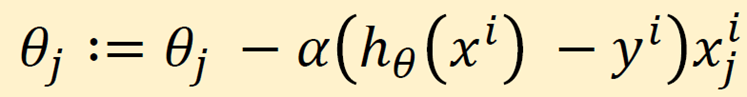

Mini Batch Gradient Descent
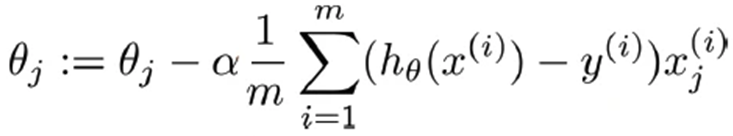

In [ ]:
#ตั้งชื่อ Class ว่า LinearRegressionModel
class LinearRegressionModel():
  #กำหนด constructor โดยรับพารามิเตอร์ 4 ตัว 
  #1.epochs สำหรับกำหนดรอบในการวนทำ หากไม่ได้กำหนด จะมี default อยู่ที่ 1000
  #2.learning_rate เป็นหนึางในค่าที่เอาไว้เปลี่ยนค่า θ หากไม่ได้กำหนด จะมี default อยู่ที่ -99
  #3.method ไว้หรับกำหนดวิธีการของ Gradient Descent Algorithm (0 = Batch, 1 = Stochastic, 2 = Mini-Batch) หากไม่ได้กำหนดจะมี default อยู่ที่ 0
  #4.batch_size คือขนาดของ Batch ที่ไว้ใช้คู่กับ Mini Batch Gradient Descent หากไม่ได้กำหนด จะมี default อยู่ที 0
  def __init__(self, epochs = 1000, learning_rate = -99, method = 0, batch_size = 0):
    self.epochs = epochs
    self.learning_rate = learning_rate
    self.method = method
    self.batch_size = batch_size
  
  #ฟังก์ชัน fit ที่รับ 2 ตัวแปร X และ Y 
  #จะเป็นฟังก์ชันในการให้ model ฝึกฝน (train)
  def fit(self, X, Y):
    self.X = copy.deepcopy(X)
    self.Y = copy.deepcopy(Y)
    
    #สมการของ Linear Regression จะมี θ ที่ 0 อยู่ซึ่งคำนวณจาก feature x ที่ 0 ซึ่งมีค่า default = 1 จึงทำการเพิ่มข้อมูลเข้าไปใน feature x
    for i in range(len(self.X)):
      self.X[i].append(1)

    #กำหนดตัวแปรต่าง ๆ ที่จะใช้ เช่น ขนาดของข้อมูลในแนว row และ col, กำหนด theta (θ) เท่ากับ 0 ตามจำนวนของ col (feature) ที่มี, best_learning_rate สำหรับหาค่า learning_rate ที่เหมาะสมกับข้อมูล
    count_row = len(self.X)
    count_col = len(self.X[0])
    theta = [0 for i in range(count_col)]
    best_learning_rate = False

    #หากไม่ได้กำหนด learning_rate มา จะกำหนดให้ learning_rate = 1 และกำหนดให้ best_learning_rate เป็น False เพื่อที่จะไปหาค่า learning_rate ที่เหมาะสม
    if self.learning_rate == -99:
      self.learning_rate = 1
      best_learning_rate = False

    #หากกำหนด learning_rate มา จะกำหนดให้ learning_rate นั้นเป็น best_learning_rate แล้ว
    else:
      best_learning_rate = True

    #หา error ของค่า theta ในปัจจุบัน
    error_old = 0
    for i in range(count_row):
      hypothesis = sum([theta[j] * self.X[i][j] for j in range(count_col)])
      error_old += math.pow(hypothesis - self.Y[i], 2)
    error_old /= 2

    #กำหนดจำนวนรอบ (iteration) = 0 หาก iteration == epochs ที่กำหนดไว้ จะ break
    iteration = 0
    J_History = []
    rmse = []
    se = []

    #ลูปจนกว่าจะเสร็จ
    while True:
      #หาก method = 0 จะทำการอัปเดตค่า theta ด้วยวิธี Batch Gradient Descent
      if self.method == 0:
        new_theta = []
        for i in range(count_col):
          gradient = 0
          for j in range(count_row):
            hypothesis = sum([theta[k] * self.X[j][k] for k in range(count_col)])
            gradient += (hypothesis - self.Y[j]) * self.X[j][i]
          new_theta.append(round(theta[i] - (self.learning_rate * gradient), 10))
        theta = new_theta.copy()

      #หาก method = 1 จะทำการอัปเดตค่า theta ด้วยวิธี Stochastic Gradient Descent
      elif self.method == 1:
        new_theta = []
        random_value = random.randint(0, count_row - 1)
        for i in range(count_col):
          hypothesis = sum([theta[k] * self.X[random_value][k] for k in range(count_col)])
          gradient = (hypothesis - self.Y[random_value]) * self.X[random_value][i]
          new_theta.append(round(theta[i] - (self.learning_rate * gradient), 10))
        theta = new_theta.copy()
      
      #หาก method = 2 จะทำการอัปเดตค่า theta ด้วยวิธี Mini Batch Gradient Descent
      elif self.method == 2:
        new_theta = []
        random_value = [random.randint(0, count_row - 1) for _ in range(self.batch_size)]
        for i in range(count_col):
          gradient = 0
          for j in random_value:
            hypothesis = sum([theta[k] * self.X[j][k] for k in range(count_col)])
            gradient += (hypothesis - self.Y[j]) * self.X[j][i]
          new_theta.append(round(theta[i] - (self.learning_rate  * (1 / self.batch_size) * gradient), 10))
        theta = new_theta.copy()

      #หา error ของค่า theta ในที่อัปเดต
      error = 0
      for i in range(count_row):
        hypothesis = sum([theta[j] * self.X[i][j] for j in range(count_col)])
        error += math.pow(hypothesis - self.Y[i], 2)
      error /= 2

      #หาก error จาก theta เก่า น้อยกว่า error จาก theta ใหม่ และมี best_learning_rate = False
      #แปลว่าค่า learning_rate ยังไม่เหมาะสม ต้องทำการหาค่า learning_rate ใหม่
      #จะให้เปลี่ยนค่า learning_rate ด้วยการหาร 1.1 และกำหนดค่า theta เป็น 0 ใหม่ 
      #และหา error ของ theta ใหม่
      if error_old < error and best_learning_rate == False:
        self.learning_rate /= 1.1
        theta = [0 for i in range(count_col)]

        error_old = 0
        for i in range(count_row):
          hypothesis = sum([theta[j] * self.X[i][j] for j in range(count_col)])
          error_old += math.pow(hypothesis - self.Y[i], 2)
        error_old /= 2

      #หาก error จาก theta เก่า มากกว่า error จาก theta ใหม่ และมี best_learning_rate = False 
      #แปลว่าค่า learning_rate เหมาะสม
      #จะให้ learning_rate ในปัจจุบันเป็น best_learning_rate
      elif error_old > error and best_learning_rate == False:
        best_learning_rate = True

      #หาก learning_rate ในปัจจุบันเป็น best_learning_rate
      #จะทำการเพิ่มรอบ และหาค่า SE, J(theta), RMSE
      if best_learning_rate:
        self.theta = theta
        predict = self.predict(self.X)

        se.append(sum([math.pow(predict[i] - self.Y[i], 2) for i in range(len(predict))]))

        J_History.append(error)
        rmse_value = 0
        for i in range(len(predict)):
          rmse_value += math.pow((predict[i] - self.Y[i]), 2)
        rmse_value = math.sqrt(rmse_value  / len(predict))
        rmse.append(rmse_value)
        iteration += 1

      #หาก iteration มีค่าเท่ากับ epochs จะทำการ break ออกจากลูป
      if iteration == self.epochs:
        break

    self.se = se
    self.J_History = J_History
    self.rmse = rmse

  #ฟังก์ชัน predict ที่รับข้อมูล test มา predict
  #โดยทำการ predict จากสมการ Linear Regression ที่มี theta จากที่หามา
  def predict(self, test):
    self.test = copy.deepcopy(test)
    predict = []
    if self.X != self.test:
      for i in range(len(self.test)):
        self.test[i].append(1)

    for i in range(len(self.test)):
      hypothesis = sum([self.theta[j] * self.test[i][j] for j in range(len(self.test[0]))])
      predict.append(round(hypothesis))
    return predict

# ขั้นตอนการจำแนกข้อมูล

ทำการแก้ปัญหาด้วย model ที่สร้างมา โดยแก้แต่ละปัญหาได้ดังนี้

## ปัญหา 1.A

In [ ]:
model = NaiveBayesModel()
model.fit(X_train_Iris, Y_train_Iris)
Y_pred_Iris = model.predict(X_test_Iris)
print(Y_pred_Iris)
print('Accuracy Score:', accuracy_score(Y_test_Iris, Y_pred_Iris))

['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Accuracy Score: 0.9666666666666667


ทำการสร้าง model NaiveBayesModel จากนั้นทำการ fit ข้อมูลด้วย X_train_Iris และ  Y_train_Iris และทำการ predict โดยการส่ง X_test_Iris ไป predict เมื่อ predict เสร็จทำการวัดประสิทธิภาพด้วยการหาค่าความแม่นยำ (Accuracy) ระหว่าง Y_test_Iris กับ Y_pred_Iris ซึ่งได้ค่า accuracy เท่ากับ 0.9666666666666667 มีค่าเข้าใกล้ 1 มาก แปลว่าค่าที่ทำนายมา มีผลลัพธ์เกือบจะเหมือนกับค่าจริงเลย หรือก็คือ จากชุดข้อมูล 1.A Model Naïve Bayes มีประสิทธิภาพดีเยี่ยม

## ปัญหา 1.B

In [ ]:
model = LinearRegressionModel()
model.fit(X_train_Wine, Y_train_Wine)
Y_pred_Wine = model.predict(X_test_Wine)
print(Y_pred_Wine)
print('Learning_rate:', model.learning_rate)
print('J_History:', model.J_History)
print('RMSE:', model.rmse)
print('SE:', model.se)

[6, 6, 6, 6, 7, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6, 7, 6, 6, 7, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 7, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6]
Learning_rate: 4.222080268017497e-07
J_

ทำการสร้าง model LinearRegressionModel โดยไม่ได้มีการกำหนดพารามิเตอร์อะไรเลย ซึ่งหมายถึงจะใช้ epochs = 1,000, learning_rate = -99, method = 0 (Batch Gradient Descent) และ batch_size = 0 จากนั้นทำการ fit ข้อมูลด้วย X_train_Wine และ  Y_train_Wine และทำการ predict โดยการส่ง X_test_Wine ไป predict เมื่อ predict เสร็จ จะเก็บข้อมูลที่ predict ไว้ในตัวแปร Y_pred_Wine จากนั้นจะทำการ print learning_rate ดูว่าใช้ learning_rate ที่เท่าไหร่ print J_History เพื่อดูว่า ค่า J(θ) ในแต่ละรอบมีค่าเท่าใด print RMSE และ SE เพื่อดูค่า Root Mean Squared Error และ Squared Error ของ training set โดยได้ผลลัพธ์ดังนี้



*   Learning_rate: 4.222080268017497e-07
*   J_History: [18203.196195080654, ..., 323.2309118425856]
*   RMSE: [5.3331541538835365, ..., 0.7723728454272594]
*   SE: [36378.0, ..., 763.0]



In [ ]:
rmse_value = 0
for i in range(len(Y_pred_Wine)):
  rmse_value += math.pow((Y_pred_Wine[i] - Y_test_Wine[i]), 2)
rmse_value = math.sqrt(rmse_value / len(Y_pred_Wine))
print('Root mean square error (from equation):',rmse_value)
print('Root mean square error (from library):', mean_squared_error(Y_pred_Wine, Y_test_Wine, squared=False))

Root mean square error (from equation): 0.7115124735378854
Root mean square error (from library): 0.7115124735378854


เมื่อ predict เสร็จ ก็จะทำการหา Root Mean Square Error (RMSE) ที่ไว้ใช้วัดความแตกต่างระหว่างค่าจริงและค่าที่ทำนายออกมา โดย RMSE มีสมการดังนี้


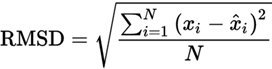

โดยได้ผลลัพธ์คือ 0.7115124735378854 ซึ่งค่าใกล้ 0 อยู่พอสมควร (ยิ่งใกล้ 0 แปลว่าค่าที่ทำนายออกมานั้นใกล้กับค่าจริงมาก ๆ) อาจกล่าวได้ว่า จากชุดข้อมูล 1.B Model Linear Regression มีประสิทธิภาพดี

In [ ]:
model = LinearRegressionModel(method = 1)
model.fit(X_train_Wine, Y_train_Wine)
Y_pred_Wine = model.predict(X_test_Wine)
print(Y_pred_Wine)
print('Learning_rate:', model.learning_rate)
print('J_History:', model.J_History)
print('RMSE:', model.rmse)
print('SE:', model.se)

OverflowError: ignored

ทำการสร้าง model LinearRegressionModel โดยกำหนดพารามิเตอร์ method = 1 ซึ่งหมายถึงจะใช้ epochs = 1,000, learning_rate = -99, method = 1 (Stochastoc Gradient Descent) และ batch_size = 0 จากนั้นทำการ fit ข้อมูลด้วย X_train_Wine และ  Y_train_Wine แต่จะเห็นว่าเกิด OverflowError: math range error ตรงส่วนของการหาค่า error ใน Model นั่นคือค่าที่หามีจำนวนสูงมากทำให้เกิด error ดังกล่าว

ซึ่งแปลว่าค่า θ ที่หามานั้น ทำให้เกิด  error เพิ่มขึ้นเรื่อย ๆ ซึ่งค่า θ มาจากการอัปเดตค่าด้วยการใช้ learning_rate ในการอัปเดต จึงกล่าวได้ว่า ค่า learning_rate ที่หามาได้นั้นไม่หมาะสม ทำให้เกิดปัญหาดังกล่าว ดังนั้น วิธี Stochastic Gradient Descent ไม่สามารถ predict ค่าได้ หรือหาก predict ได้ค่าที่ได้มานั้นก็ต่างจากค่าจริงมาก ๆ ดูจาก error ที่เกิดขึ้น

In [ ]:
model = LinearRegressionModel(method = 2, batch_size = 1000)
model.fit(X_train_Wine, Y_train_Wine)
Y_pred_Wine = model.predict(X_test_Wine)
print(Y_pred_Wine)
print('Learning_rate:', model.learning_rate)
print('J_History:', model.J_History)
print('RMSE:', model.rmse)
print('SE:', model.se)

[6, 6, 6, 6, 7, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6, 7, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 7, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6]
Learning_rate: 0.0005370044350549921
J_

ทำการสร้าง model LinearRegressionModel โดยกำหนดพารามิเตอร์ method = 2 และ batch_size = 1000 ซึ่งหมายถึงจะใช้ epochs = 1,000, learning_rate = -99, method = 2 (Mini Batch Gradient Descent) และ batch_size = 1000 จากนั้นทำการ fit ข้อมูลด้วย X_train_Wine และ  Y_train_Wine และทำการ predict โดยการส่ง X_test_Wine ไป predict เมื่อ predict เสร็จ จะเก็บข้อมูลที่ predict ไว้ในตัวแปร Y_pred_Wine จากนั้นจะทำการ print learning_rate ดูว่าใช้ learning_rate ที่เท่าไหร่ print J_History เพื่อดูว่า ค่า J(θ) ในแต่ละรอบมีค่าเท่าใด print RMSE และ SE เพื่อดูค่า Root Mean Squared Error และ Squared Error ของ training set โดยได้ผลลัพธ์ดังนี้



*   Learning_rate: 0.0005370044350549921
*   J_History: [17993.330548983427, ..., 323.94470701749657]
*   RMSE: [5.306994514227636, ..., 0.7738897821006028]
*   SE: [36022.0, ..., 766.0]

(ผลลัพธ์ที่ได้จะแตกต่างกันทุกรอบ เนื่องจากการสุ่มค่าในการอัปเดตค่า θ)

In [ ]:
rmse_value = 0
for i in range(len(Y_pred_Wine)):
  rmse_value += math.pow((Y_pred_Wine[i] - Y_test_Wine[i]), 2)
rmse_value = math.sqrt(rmse_value / len(Y_pred_Wine))
print('Root mean square error (from equation):',rmse_value)
print('Root mean square error (from library):', mean_squared_error(Y_pred_Wine, Y_test_Wine, squared=False))

Root mean square error (from equation): 0.7224091638399944
Root mean square error (from library): 0.7224091638399944


เมื่อ predict เสร็จ ก็จะทำการหา Root Mean Square Error (RMSE) ที่ไว้ใช้วัดความแตกต่างระหว่างค่าจริงและค่าที่ทำนายออกมา

โดยได้ผลลัพธ์คือ 0.724568837309472 ซึ่งจะได้ค่ามากกว่าของวิธี Batch Gradient Descent  เล็กน้อย อาจเป็นเพราะการกำหนด batch_size = 1000 ทำให้ได้ผลลัพธ์ดังกล่าว หากปรับค่า batch_size ให้มากขึ้น อาจทำให้ได้ผลลัพธ์ที่ใกล้กับค่าจริงมากกว่านี้

จากผลลัพธ์ทั้ง 3 วิธี จะเห็นได้ว่า Batch Gradient Descent มีประสิทธิภาพดีที่สุดใน 3 วิธีนี้ ซึ่งได้ค่า Root Mean Squared Error อยู่ที่ 0.7115124735378854

แต่เนื่องจากวิธี Batch Gradient Descent มีค่า learning rate ที่น้อยมาก จึงขอเลือกวิธี Mini Batch Gradient Descent ที่มีค่าใกล้เคียงกัน มาทำการทดลองในข้อที่ 2.4.1

ทำการกำหนด learning rate = 0.0005370044350549921 และใช้ Mini Batch Gradient Descent โดยกำหนด batch_size = 1000 โดยในแต่ละรอบจะทำการ print ค่า RMSE ของ Training set และ Test set 

In [ ]:
for i in range(100):
  model = LinearRegressionModel(epochs = i+1, learning_rate = 0.0005370044350549921, method = 2, batch_size = 1000)
  model.fit(X_train_Wine, Y_train_Wine)
  if i < 3 or i == 99:
    if i == 99:
      print()
    Y_pred_Wine = model.predict(X_test_Wine)
    print('Iteration =', i+1)
    print('RMSE from training set:', np.mean(np.array(model.rmse)))
    print('RMSE from test set', mean_squared_error(Y_pred_Wine, Y_test_Wine, squared=False), end='\n')
  else:
    print('.', end=' ')

Iteration = 1
RMSE from training set: 5.12471513729959
RMSE from test set 5.7265827506463225
Iteration = 2
RMSE from training set: 5.421225207102889
RMSE from test set 5.53031418637314
Iteration = 3
RMSE from training set: 4.875641942232389
RMSE from test set 5.195550981368578
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Iteration = 100
RMSE from training set: 1.4573251539838796
RMSE from test set 0.7866066361276137


จากผลลัพธ์จะเห็นว่า Iteration ที่ 1 - 3 นั้น ค่า RMSE ของ Training set และ Test set นั้น มีค่าอยู่ที่ 5 แต่เมื่อวนลูปอัปเดตค่า θ ไปเรื่อย ๆ ค่า RMSE ของ Training set ก็ลดลงเรื่อย ๆ ซึ่งค่าสุดท้าย Iteration ที่ 100 จะมีค่า RMSE ของ Training set อยู่ที่ 1.45 และค่า RMSE ของ Test set อยู่ที่ 0.78 ซึ่งสามารถอธิบายได้ว่า ยิ่งค่า RMSE ของ Training set ลดลง ค่า RMSE ของ Test set ก็ลดลงด้วยเช่นกัน ซึ่งหากทำการทดลองไปเรื่อย ๆ ค่า RMSE ของทั้ง Training set และ Test set จะลดลงไปเรื่อย ๆ เช่นกัน

ต่อมาจะทำการทดลองเพื่อตอบคำถามในข้อ 2.4.2

โดยจะกำหนด learning rate อยู่ที่ 1, 0.1, 0.01, 0.001 และ 0.0001 เพื่อดูค่า Squared Errors ของ Traning set เมื่อค่า learning rate เปลี่ยนแปลงไป

In [ ]:
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]

for i in learning_rates:
  model = LinearRegressionModel(epochs = 10, learning_rate = i, method = 2, batch_size = 100)
  model.fit(X_train_Wine, Y_train_Wine)
  Y_pred_Wine = model.predict(X_test_Wine)
  print('At learning rate =', i, 'Squared Errors =', model.se)

At learning rate = 1 Squared Errors = [301643012082.0, 6.498638887062277e+18, 1.0020141138831667e+26, 1.3037746725741762e+33, 1.381470070106963e+40, 2.2185746811160015e+47, 2.0438984832517385e+54, 2.0736736270897545e+61, 2.3341265299646427e+68, 2.437976265100365e+75]
At learning rate = 0.1 Squared Errors = [2750852493.0, 271831993216099.0, 5.197900338411581e+19, 8.304338469835542e+24, 8.116429655832306e+29, 4.773974604838848e+34, 9.899319701812385e+39, 1.2862615944489677e+45, 1.6766276512607533e+50, 2.75255690110623e+55]
At learning rate = 0.01 Squared Errors = [24132092.0, 29901115316.0, 52427008097868.0, 7.20449634921851e+16, 9.864868546000277e+19, 9.14244109311977e+22, 8.969855572343081e+25, 8.636929898626863e+28, 1.4385349921512756e+32, 3.587841468357928e+35]
At learning rate = 0.001 Squared Errors = [210477.0, 2367301.0, 9874261.0, 82891293.0, 395257713.0, 2098108791.0, 7611000826.0, 34835566005.0, 167816051915.0, 1578811947364.0]
At learning rate = 0.0001 Squared Errors = [25499.

จากผลลัพธ์จะเห็นว่าที่ค่า learning rate = 1, 0.1, 0.01, 0.001 นั้นเมื่ออัปเดตค่า θ แล้วนั้นส่งผลให้ค่า Squared Errors เพิ่มขึ้นเรื่อย ๆ ซึ่งหมายถึงค่า learning rate ไม่เหมาะสมกับข้อมูล ทำให้เมื่ออัปเดตค่า θ แล้วนั้น ส่งผลให้ Squared Errors เพิ่มขึ้นเรื่อย ๆ ในทางกลับกัน ที่ค่า learning rate = 0.0001 เมื่ออัปเดตค่า θ แล้วนั้นส่งผลให้ค่า Squared Errors ลดลงเรื่อย ๆ ซึ่งหมายความว่า learning rate นี้ เหมาะสมกับข้อมูล ทำให้เมื่ออัปเดตค่า θ แล้ว ส่งผลให้ Squared Errors ลดลงเรื่อย ๆ

## ปัญหา 1.C

In [ ]:
model = NaiveBayesModel()
model.fit(X_train_Loan, Y_train_Loan)
Y_pred_Loan = model.predict(X_test_Loan)
print(Y_pred_Loan)
print('Accuracy Score:', accuracy_score(Y_test_Loan, Y_pred_Loan))

['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']
Accuracy Score: 0.7291666666666666


ทำการสร้าง model NaiveBayesModel จากนั้นทำการ fit ข้อมูลด้วย X_train_Loan และ  Y_train_Loan และทำการ predict โดยการส่ง X_test_Loan ไป predict เมื่อ predict เสร็จทำการวัดประสิทธิภาพด้วยการหาค่าความแม่นยำ (Accuracy) ระหว่าง Y_test_Loan กับ Y_pred_Loan ซึ่งได้ค่า accuracy เท่ากับ 0.7291666666666666 ผลลัพธ์ที่ทำนายออกมา ทำนายถูกถึง 7 ใน 10 ของข้อมูล ก็อาจกล่าวได้ว่า จากชุดข้อมูล 1.C Model Naïve Bayes มีประสิทธิภาพดี

In [ ]:
model = NaiveBayesModel()
model.fit(X_train_Loan_No_Answer, Y_train_Loan_No_Answer)
Y_pred_Loan_No_Answer = model.predict(X_test_Loan_No_Answer)
print(Y_pred_Loan_No_Answer)

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

จากนั้น ลองนำ X_train_Loan_No_Answer และ Y_train_Loan_No_Answer ไปทำการ fit ข้อมูล และทำการ predict ผลลัพธ์ออกมา แต่เนื่องจากข้อมูลไม่มีเฉลย ทำให้ไม่สามารถวัดประสิทธิภาพได้

# สมาชิกกลุ่ม

6209650081 นายภีมภัช พจน์สุนทร

6209650149 นางสาวนวพร วิริยะภาพ

6209650214 นางสาวพรกนก ศรีสังสิทธิสันติ

6209650701 นางสาวณัฐวรา บุญหนัก